Load Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.utils import array_to_img, img_to_array, load_img

Load Data

In [2]:
def load_data(path):

    data = pd.read_csv(path)
    return data

train_df = load_data('Train.csv')
train_df.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


Data Understanding

In [3]:
def check_col(data):

    col = data.columns
    return col

check_col(train_df)

Index(['ID', 'filename', 'growth_stage', 'damage', 'extent', 'season'], dtype='object')

In [3]:
def check_shape_info(data):

    print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")
    print("**********************************************************************")
    print(data.info())

check_shape_info(train_df)

The dataset contains 26068 rows and 6 columns
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            26068 non-null  object
 1   filename      26068 non-null  object
 2   growth_stage  26068 non-null  object
 3   damage        26068 non-null  object
 4   extent        26068 non-null  int64 
 5   season        26068 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


In [4]:
def descriptive_analysis(data, col):

    descriptive_analysis = data[col]
    return descriptive_analysis.describe()

col = ['extent']
descriptive_analysis(train_df, col)

,extent
count,26068.000000
mean,7.096056
std,18.613229
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [5]:
def tally_responses(data, col):

    unique_response = data[col].value_counts()
    return unique_response

col = ['growth_stage']
tally_responses(train_df, col)

growth_stage
V               10015
M                6664
F                6164
S                3225
Name: count, dtype: int64

In [7]:
col = ['damage']
tally_responses(train_df, col)

damage
G         11623
WD         9238
DR         4516
ND          272
PS          254
DS          115
WN           37
FD           13
Name: count, dtype: int64

In [8]:
col = ['season']
tally_responses(train_df, col)

season
SR2021    9927
LR2021    7945
SR2020    6163
LR2020    2033
Name: count, dtype: int64

## Data Cleaning  

In [9]:
def missing(df):
    #missing values
    missing_values = df.isnull().sum()
    
    #duplicate
    duplicates = df.duplicated().sum()
    
    return(duplicates)

    
missing(train_df)
#outliers 


0

In [10]:
# train_df.plot.box('extent')

In [10]:
train_df.extent.value_counts().sort_values(ascending=False)

extent
0      21558
10       729
30       727
40       696
20       690
50       445
60       388
90       300
80       291
70       199
100       45
Name: count, dtype: int64

In [11]:
mean = np.mean(train_df['extent'])
std = np.std(train_df['extent'])
print('mean of the dataset is', mean)
print('std. deviation is', std)
threshold = 3
outlier = []
for i in train_df['extent']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
#print('outlier in dataset is', outlier)

mean of the dataset is 7.096056467699862
std. deviation is 18.61287150126683


In [13]:
type(outlier)

list

In [14]:
# outlier.sort_values(by = 'outlier', ascending=False)

In [15]:
# outlier.columns=['outlier']

In [16]:
# outlier.plot.box('outlier')

In [17]:
"""def outliers(data, threshold=3):
    z_score = data(data - data.mean()) / data.std()
    outliers = """

'def outliers(data, threshold=3):\n    z_score = data(data - data.mean()) / data.std()\n    outliers = '

In [18]:
train_df[train_df['extent' ] >= 70].sort_values(by='extent').head(30)

,ID,filename,growth_stage,damage,extent,season
41,ID_L3YYRSTAP8,L134F00762C01S05370Rp14099.jpg,M,DR,70,SR2020
12807,ID_BYI3EN5G0H,L131F03896C01S01628Rp14769.jpg,M,DR,70,SR2020
12792,ID_QYNEVRH9VU,L222F01109C01S03762Rp14789.jpg,M,DR,70,SR2020
12771,ID_1WE68UZB5E,L1116F02814C39S11846Rp41275.jpg,M,DR,70,SR2021
12756,ID_3D1M164W3A,201_repeat_2_1382_6393_4759.JPG,M,DR,70,LR2020
12496,ID_HINHZ4AYCE,L1095F00444C39S12039Rp43714.jpg,M,DR,70,SR2021
12315,ID_3L3MNX2GLO,21_repeat_2_1361_6009_4370.JPG,M,DR,70,LR2020
12195,ID_Q6VUY9C2ZC,L429F01858C01S02065Rp13273.jpg,M,DR,70,SR2020
12002,ID_56M7GHWF31,L144F00512C01S07633Rp30712.jpg,M,DR,70,LR2021
11972,ID_EK9VBT298G,158_repeat_2_1490_5508_3885.JPG,M,DR,70,LR2020


### EDA Summary 

## Exploratory Data Analysis

In [19]:
train_df.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


## Distribution of Data 

In [ ]:
plt.style.use(fivethirtyeight)

In [83]:
def hist_plot(col):
    
    plt.hist(col, edgecolor = 'black', color = 'orange', log = True);
    plt.title("Histogram Showing Distribution")
    plt.xlabel('Extent of Damage')
    plt.ylabel('Count')    

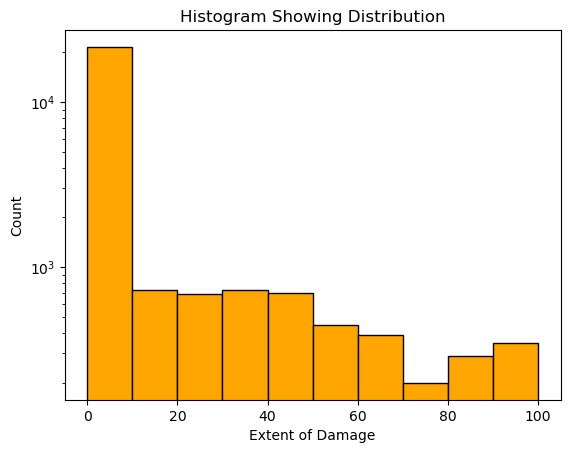

In [84]:
col = train_df['extent']
hist_plot(col)

## Observation

1. The data is positively skewed 

In [34]:
def bar_plot(x, y):
    
    plt.bar(x, y, color = 'green', edgecolor = 'black')
    plt.title('Bar Plot Showing Damage type against Extent')
    plt.xlabel('Damage Type')
    plt.ylabel('Extent of Damage')

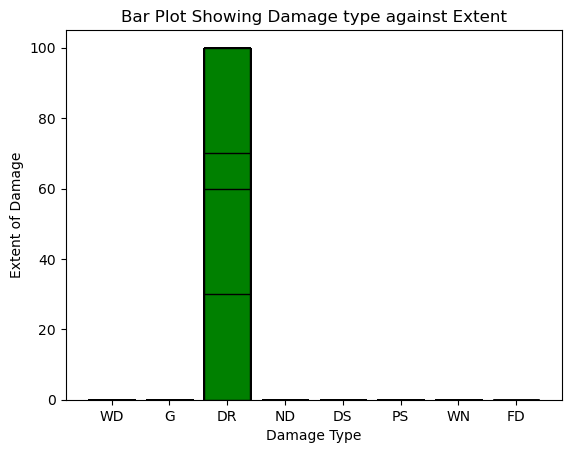

In [35]:
x = train_df['damage']
y = train_df['extent']

bar_plot(x, y)

In [ ]:
## Observation
1. Drought Damaged crops had the most dire effects / greatest extent damage on crops 

In [103]:
def plot_pie_chart(unique_counts, labels):
    
    plt.pie(unique_counts, startangle=45, shadow = True, labels = labels, autopct = '%1.1f%%')
    plt.title('Pie Chart')
    plt.show()
    

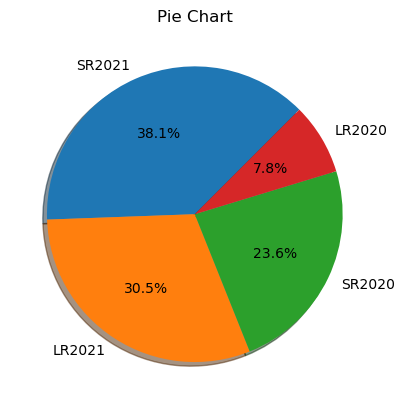

In [104]:
seasons_counts = train_df['season'].value_counts()
unique_counts = seasons_counts.values # values attribute of a pandas series 
labels = seasons_counts.index

plot_pie_chart(unique_counts, labels)

## Observations 
1. a great amount of data was collected during the long rain season in 2021 and during the short rain seaso season in 2021 

In [133]:
def horizontal_bar(counts):
    
    sorted_counts = counts.sort_values(ascending=True)
    sorted_counts.plot.barh(width = 0.5, log = True, edgecolor = 'black')
    plt.title('Horizontal Bar')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')

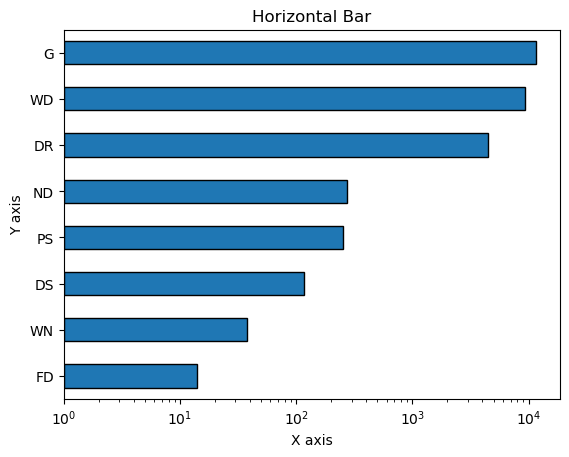

In [134]:
horizontal_bar(damage_counts)

*Note*
1. next visualization will require comparison between two or more columns 